# Classify images
## fashion MNIST
source [site](https://www.tensorflow.org/beta/tutorials/keras/basic_classification)


In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
train_images.shape # same dimension with MNIST but it's fashion images

(60000, 28, 28)

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

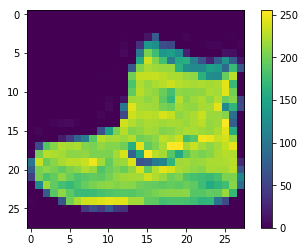

In [6]:
plt.figure() # make image holder
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show() # value are 0~255

In [7]:
train_images = train_images / 255.0

test_images = test_images / 255.0 # scaling 0~1

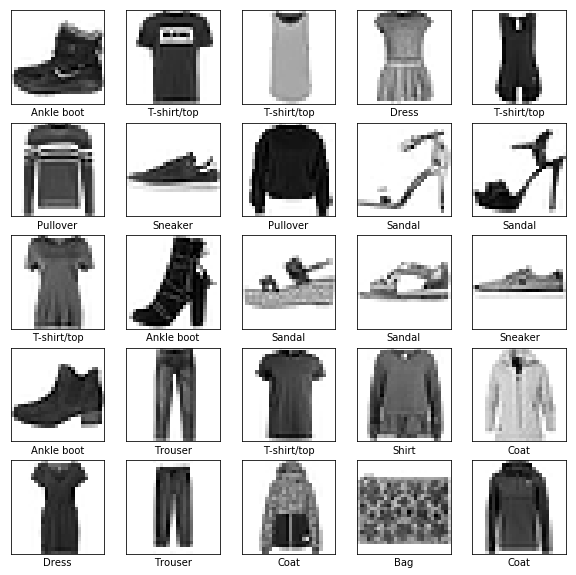

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [9]:
class MyModel(keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.flatten = keras.layers.Flatten(input_shape=(28,28))
        self.d1 = keras.layers.Dense(128, activation='relu')
        self.d2 = keras.layers.Dense(10, activation='softmax')
    def call(self, x):
        x = self.flatten(x)
        x = self.d1(x)
        return self.d2(x)
# build modes with class
model = MyModel()

In [10]:
loss_object = keras.losses.SparseCategoricalCrossentropy()

optimizer = keras.optimizers.Adam()

In [11]:
train_loss = keras.metrics.Mean(name='train_loss')
train_accuracy = keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')
# for evaluation metrix
test_loss = keras.metrics.Mean(name='test_loss')
test_accuracy = keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

In [12]:
@tf.function
def train_step(images, labels):
    with tf.GradientTape() as tape:
        predictions = model(images)
        loss = loss_object(labels, predictions) 
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    
    train_loss(loss) # for evaluation metric
    train_accuracy(labels, predictions) # # for evaluation metric

In [13]:
@tf.function
def test_step(images, labels):
  predictions = model(images)
  t_loss = loss_object(labels, predictions)
# note that there's no gradients or optimizer function, 
# just predictions and loss calculations.
  test_loss(t_loss)
  test_accuracy(labels, predictions)

In [14]:
train_images = train_images[..., tf.newaxis]
train_labels = train_labels[..., tf.newaxis] # for batch training

In [15]:
train_ds = tf.data.Dataset.from_tensor_slices(
    (train_images, train_labels)).shuffle(10000).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(32)

In [16]:
EPOCHS = 5

for epoch in range(EPOCHS):
  for images, labels in train_ds:
    train_step(images, labels)

  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  template = 'Epoch {}, Loss: {}, Accuracy: {}, Test Loss: {}, Test Accuracy: {}'
  print (template.format(epoch+1,
                         train_loss.result(),
                         train_accuracy.result()*100,
                         test_loss.result(),
                         test_accuracy.result()*100))

Epoch 1, Loss: 0.4941820502281189, Accuracy: 82.77333068847656, Test Loss: 0.4454338848590851, Test Accuracy: 83.95999908447266
Epoch 2, Loss: 0.43224650621414185, Accuracy: 84.75749969482422, Test Loss: 0.42896750569343567, Test Accuracy: 84.54000091552734
Epoch 3, Loss: 0.3984893560409546, Accuracy: 85.85277557373047, Test Loss: 0.4170331656932831, Test Accuracy: 84.91667175292969
Epoch 4, Loss: 0.3752741515636444, Accuracy: 86.59166717529297, Test Loss: 0.40874549746513367, Test Accuracy: 85.26750183105469
Epoch 5, Loss: 0.3576400578022003, Accuracy: 87.16633605957031, Test Loss: 0.40207791328430176, Test Accuracy: 85.52400207519531


In [17]:
predictions = model(test_images) # if you didn't use compile function, just input the images

In [18]:
predictions[0]

<tf.Tensor: id=22894, shape=(10,), dtype=float64, numpy=
array([1.47945615e-02, 1.18405622e-04, 1.92502744e-04, 9.81076451e-01,
       9.72553198e-05, 1.86545047e-06, 3.68652466e-03, 1.82846084e-08,
       3.21908179e-05, 2.24553352e-07])>

In [19]:
class_names[np.argmax(predictions[0])]

'Dress'

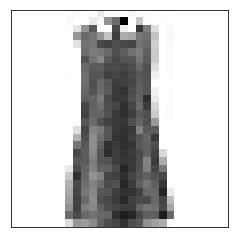

In [20]:
plt.figure() # see the test image 0
plt.imshow(test_images[0], cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

In [37]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == int(true_label):
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

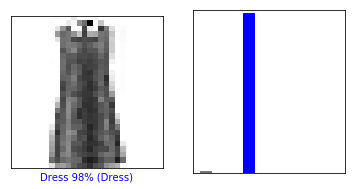

In [38]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

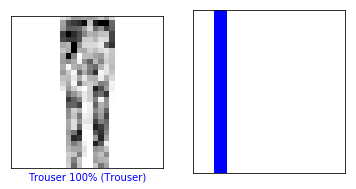

In [40]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

* make prediction for just one test image

In [41]:
img = test_images[0]
img.shape

TensorShape([28, 28])

In [42]:
img = (np.expand_dims(img,0)) # add batch(like there's sample array)
img.shape

(1, 28, 28)

In [46]:
predictions_single = model(img)
print(predictions_single)

tf.Tensor(
[[1.47945615e-02 1.18405622e-04 1.92502744e-04 9.81076451e-01
  9.72553198e-05 1.86545047e-06 3.68652466e-03 1.82846084e-08
  3.21908179e-05 2.24553352e-07]], shape=(1, 10), dtype=float64)


In [47]:
np.argmax(predictions_single)

3

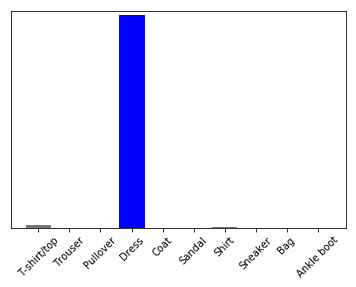

In [45]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)